In [2]:
%matplotlib inline

In [89]:
import itertools

In [3]:
import matplotlib; matplotlib.__version__

'3.5.1'

In [126]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects
import numpy as np


In [5]:
N = 5
data = np.tile(np.arange(N),(N,1))

In [6]:
data.shape

(5, 5)

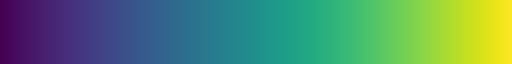

In [7]:
cmap = plt.get_cmap('viridis')
cmap

In [9]:
norm.boundaries

array([0, 1, 2, 3, 4, 5])

In [178]:
scaled = 2 
norm = mcolors.BoundaryNorm(np.arange(N*scaled-1), cmap.N)

In [179]:
norm.boundaries

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

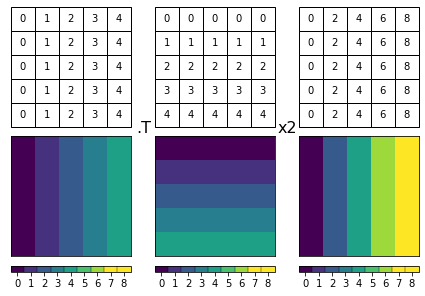

In [180]:
fig, axd = plt.subplot_mosaic([['ti', 'tr', 'ts'], ['mi', 'mr', 'ms']], constrained_layout=True )
def make_set(ax_t, ax_m, data):
    axd[ax_t].table(data, cellLoc='center', bbox= [0,0, 1,1])
    axd[ax_t].set_aspect("equal")
    axd[ax_t].axis('off')
    mi = axd[ax_m].matshow(data, cmap=cmap, norm=norm)
    axd[ax_m].set(xticks=[], yticks=[])
    cb = fig.colorbar(mi, ax=axd[ax_m], values = np.arange(N*scaled-1), 
                      orientation='horizontal', drawedges=True, fraction=.05)
    
make_set('ti', 'mi', data)
make_set('tr', 'mr', data.T)
make_set('ts', 'ms', data*scaled)
    
fig.text(1.05, -.05, '.T', fontsize=16, transform=axd['ti'].transData)
fig.text(1.025, -.05, 'x2', fontsize=16, transform=axd['tr'].transData)
fig.savefig('../figures/equivariance.png')

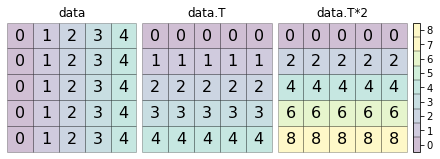

In [183]:
alpha = .25
fig, axd = plt.subplot_mosaic([['ti','tr', 'ts']], constrained_layout=True )

def make_set(ax_t, data):
    tab = axd[ax_t].table(data, cellLoc='center', bbox= [0,0, 1,1])
    for (r,c) in itertools.product(range(N), range(N)):
        #.set_color(cmap(norm(data[r,c])))
        tab[(r,c)].set_color(cmap(norm(data[r,c])))
        tab[(r,c)].set_alpha(alpha)
        tab[(r,c)].set_edgecolor('black')
        text = tab[(r,c)].get_text()
        text.set(fontsize=16, ha='center', va='center')
    axd[ax_t].set_aspect("equal")
    axd[ax_t].axis('off')

make_set('ti', data)
make_set('tr', data.T)
make_set('ts', data.T*scaled)

axd['ti'].set_title('data')
axd['tr'].set_title('data.T')
axd['ts'].set_title('data.T*2') 
fig.colorbar(None, ax=axd['ts'], cmap=cmap, norm=norm, alpha=alpha, 
             values = np.arange(N*scaled-1), drawedges=True, fraction=.05)

fig.savefig('../figures/equiviz.png')